In [54]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

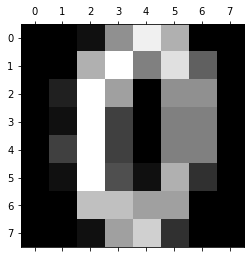

0


In [55]:
digits = datasets.load_digits()
print(digits.data)
print(digits.target)

plt.gray() 

plt.matshow(digits.images[10])

plt.show()
print(digits.target[10])



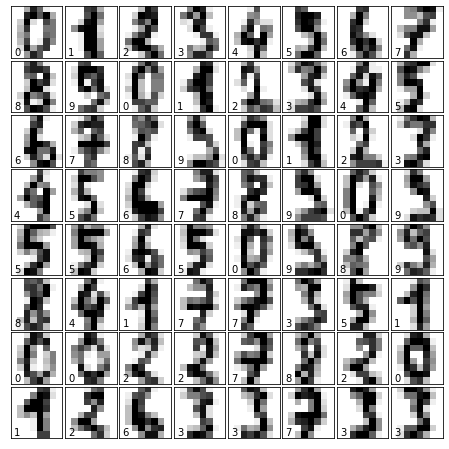

In [56]:
#Figure size (width, height)
fig = plt.figure(figsize=(6, 6))

#Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#For each of the 64 images
for i in range(64):

    #Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    #Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    #Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()



([<matplotlib.axis.XTick at 0x12f4430d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

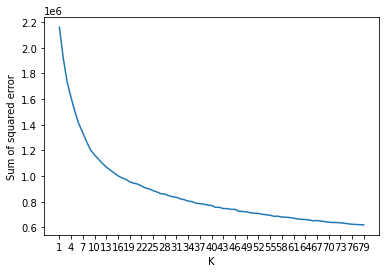

In [57]:
sse_1 = []
k_rng1 = range(1,80)
for k in k_rng1:
    km = KMeans(n_clusters=k)
    km.fit(digits.data)
    sse_1.append(km.inertia_)

plt.figure()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng1,sse_1)
plt.xticks(range(1, 80, 3))


In [58]:
####################
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state = 45)

###################
    
model = KMeans(n_clusters=10, tol=0.0001, random_state=45)
model.fit(X_train, y_train)


plt.figure(figsize=(8, 3))
plt.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])

  #Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)),  cmap=plt.cm.binary)
plt.show()



<Figure size 576x216 with 0 Axes>

Classification report for classifier KMeans(n_clusters=10, random_state=45):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.43      0.70      0.53        33
           2       0.00      0.00      0.00        35
           3       0.97      0.85      0.91        41
           4       1.00      0.91      0.95        45
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        39
           8       0.05      0.03      0.04        32
           9       0.00      0.00      0.00        37

    accuracy                           0.28       360
   macro avg       0.25      0.25      0.24       360
weighted avg       0.28      0.28      0.28       360




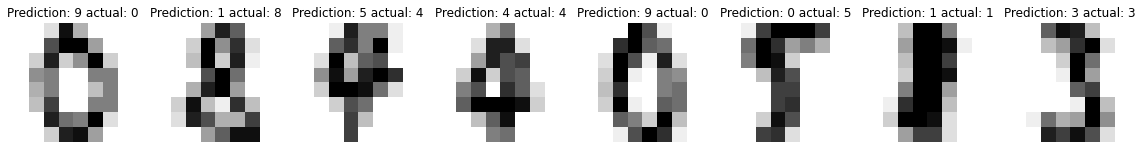

In [59]:

#Predicting labels
predicted = model.fit_predict(X_test)

###############################################################################
# Below we visualize the first 4 test samples and show their predicted
# digit value in the title.

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 3))
for ax, image, prediction, actual in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} actual: {actual}")

###############################################################################
# :func:`~sklearn.metrics.classification_report` builds a text report showing
# the main classification metrics.

print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)